# Lab 8: Feature Engineering and Polynomial Regression

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng

np.set_printoptions(precision=2)

## Feature Engineering

### Fitting polynomial data without feature engineering (not good fit)

Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


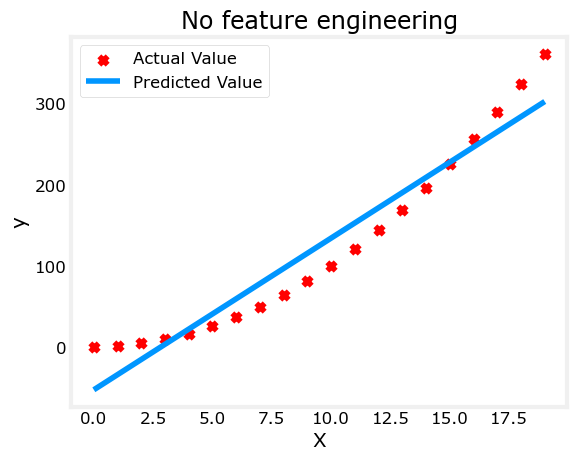

In [18]:
# Create quadratic data from scratch
x = np.arange(0, 20, 1)
y = 1 + x**2

# Optimize w and b using linear regression (linear best fit line)
X = x.reshape(-1, 1)
model_w, model_b = run_gradient_descent_feng(X, y, iterations = 1000, alpha = 1e-2)

# Plot the data and best-fit line
plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.title('No feature engineering')
plt.plot(x, X@model_w + model_b, label='Predicted Value')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Fitting polynomial data with added quadratic feature (better fit)

Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


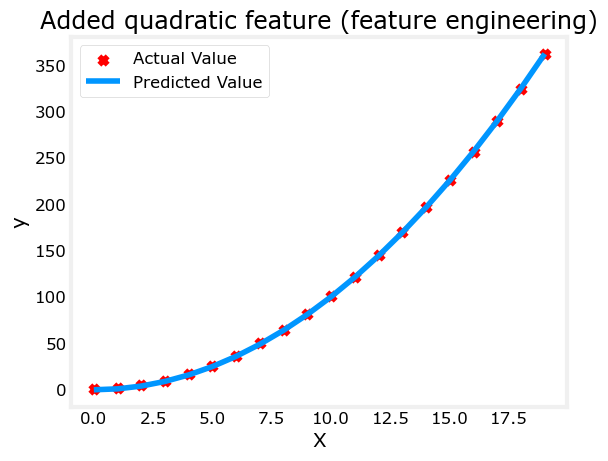

In [24]:
# Create quadratic data from scratch
x = np.arange(0, 20, 1)
y = 1 + x**2

# Add an engineered polynomial feature: x^2
X = x**2

# Optimize w and b using polynomial regression (polynomial best fit line)
X = X.reshape(-1, 1)
model_w, model_b = run_gradient_descent_feng(X, y, iterations = 10000, alpha = 1e-5)

plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.title('Added quadratic feature (feature engineering)')
plt.plot(x, X@model_w + model_b, label='Predicted Value')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Fitting polynomial data with added cubic feature (too much, less optimal fit)

In the output of optimized weights below...
* coefficient/weight associated with the linear term (x): 0.08
* coefficient/weight associated with the quadratic term (x^2): 0.55
* coefficient/weight associated with the cubic term (x^3):0.03

From these outputs, we see that gradient descent 'picked' the quadratic feature as the most impactful in terms of predicting a correct outcome because that coefficient/weigh is much larger than the others. 

This exercise shows us how we can use the output of gradient descent to further refine the best fit line. In the next iteration, we could simply drop the cubic feature (x^3).

Iteration         0, Cost: 1.16186e+03
Iteration      1000, Cost: 3.41850e+02
Iteration      2000, Cost: 2.91813e+02
Iteration      3000, Cost: 2.49102e+02
Iteration      4000, Cost: 2.12644e+02
Iteration      5000, Cost: 1.81524e+02
Iteration      6000, Cost: 1.54959e+02
Iteration      7000, Cost: 1.32284e+02
Iteration      8000, Cost: 1.12928e+02
Iteration      9000, Cost: 9.64059e+01
w,b found by gradient descent: w: [0.08 0.55 0.03], b: 0.0110


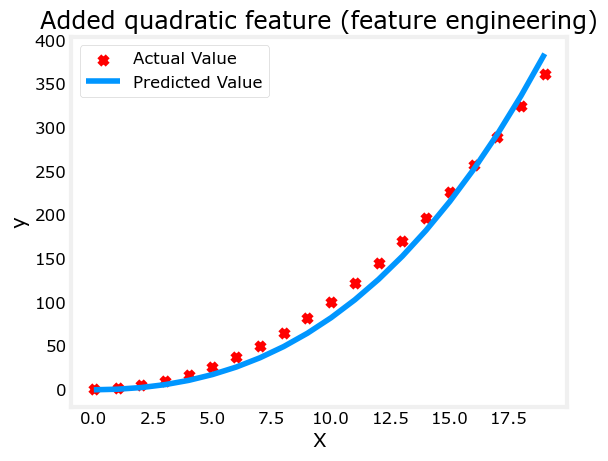

In [31]:
# Create quadratic data from scratch
x = np.arange(0, 20, 1)
y = 1 + x**2

# Add engineered polynomial features: x^2 and x^3
X = np.c_[x, x**2, x**3]

# Optimize w and b using polynomial regression (polynomial best fit line)
model_w, model_b = run_gradient_descent_feng(X, y, iterations = 10000, alpha = 1e-7)

plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.title('Added quadratic feature (feature engineering)')
plt.plot(x, X@model_w + model_b, label='Predicted Value')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Proving that we are still doing linear regression

Although the quadratic feature/term (x^2) was most impactful in predicting the outcome and the model formed a quadratic curve, we are still using linear regression. Another way to think about this is that the best features are the ones that are linear relative to the target/best fit curve.

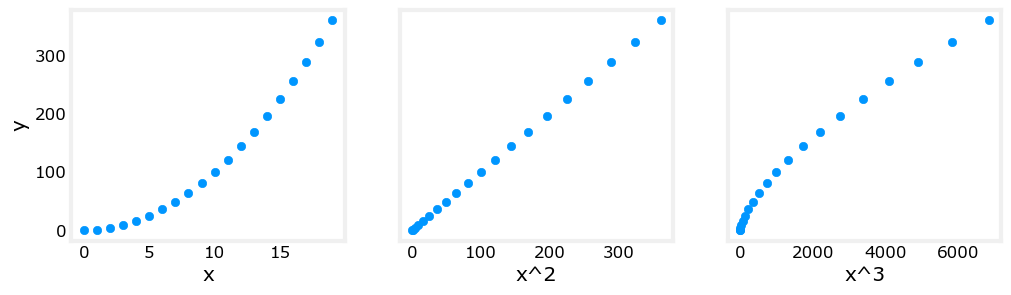

In [40]:
# Create quadratic data from scratch
x = np.arange(0, 20, 1)
y = x**2

# Add engineered polynomial features: x^2 and x^3
X = np.c_[x, x**2, x**3]
X_features = ['x', 'x^2', 'x^3']

# Plot each separate term relative to the target.
fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X[:, i], y)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel('y')
plt.show()

## Feature Scaling

Above we did feature engineering to add quadratic (x^2) and cubic (x^3) features. The ranges of the inputs of those newly introduced features will naturally be much higher than the ranges of the original inputs. 

We should use feature scaling to improve the speed of gradient descent.

In [50]:
# Create polynomial data set
x = np.arange(0, 20, 1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw    X:{np.ptp(X, axis=0)}")

# Add mean normalization
X = zscore_normalize_features(X)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X, axis=0)}")

Peak to Peak range by column in Raw    X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]


### Use more aggressive value of alpha (learning rate)

Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


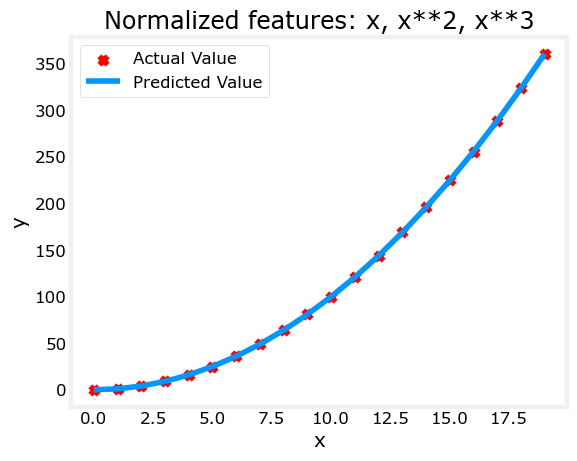

In [57]:
x = np.arange(0, 20, 1)
y = x**2
X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.title('Normalized features: x, x**2, x**3')
plt.plot(x, X@model_w + model_b, label='Predicted Value')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# NB: Note again that the quadratic term ends up with the largest coefficient. It is clearly the most impactful in predicting the correct output.

### Even more complex functions

Iteration         0, Cost: 2.20188e-01
Iteration    100000, Cost: 1.70074e-02
Iteration    200000, Cost: 1.27603e-02
Iteration    300000, Cost: 9.73032e-03
Iteration    400000, Cost: 7.56440e-03
Iteration    500000, Cost: 6.01412e-03
Iteration    600000, Cost: 4.90251e-03
Iteration    700000, Cost: 4.10351e-03
Iteration    800000, Cost: 3.52730e-03
Iteration    900000, Cost: 3.10989e-03
w,b found by gradient descent: w: [ -1.34 -10.    24.78   5.96 -12.49 -16.26  -9.51   0.59   8.7   11.94
   9.27   0.79 -12.82], b: -0.0073


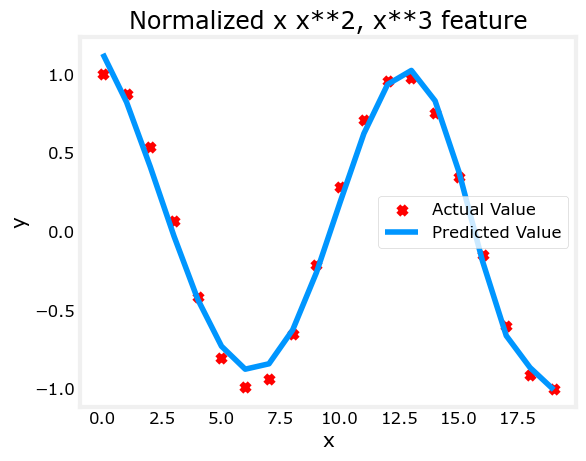

In [60]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()